In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
from pathlib import Path
import random
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import sys
import os
import logging
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D      

In [3]:
sns.set_style("whitegrid")

In [4]:
# Path to load mainDF from
load_path = '/Volumes/Britt_SSD/ReDoEvals3/comboEval.parquet'
# Path to save visuals
save_path = '/Users/byrdsmyth/iCloud/Documents/School/Thesis/Stimuli/'
# Set printed output or not
verbose = False
# Set to save figures or not
saveFigs = True
# Set figuresize
FS = (15,7)
# list of actions
action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# coord for legends
fakexy = (0, 0)
# font sizes 
fnt = 24
fnt2 = 19
fnt3 = 15

In [5]:
allEvalsDF = pd.read_parquet(load_path)

In [6]:
# Generate list of agents in order
evalAgents = allEvalsDF.agentNum.unique()

# conds = [allEvalsDF['agent']=='pop700',allEvalsDF['agent']=='pop23',allEvalsDF['agent']=='fear2', \
#          allEvalsDF['agent']=='fear18',allEvalsDF['agent']=='nml3', allEvalsDF['agent']=='nml21',  \
#          allEvalsDF['agent']=='std300', allEvalsDF['agent']=='std2', allEvalsDF['agent']=='std23', \
#          allEvalsDF['agent']=='std232']

conds = [allEvalsDF['agent']=='PowerPill_700k',allEvalsDF['agent']=='PowerPill_23M',allEvalsDF['agent']=='FearGhosts_2M', \
         allEvalsDF['agent']=='FearGhosts_18M',allEvalsDF['agent']=='Dots_3M', allEvalsDF['agent']=='Dots_21M',  \
         allEvalsDF['agent']=='Standard_300k', allEvalsDF['agent']=='Standard_2M', allEvalsDF['agent']=='Standard_23_run1', \
         allEvalsDF['agent']=='Standard_23_run2']

choices = ["PowerPill_700k","PowerPill_23M","AvoidGhosts_2M","AvoidGhosts_18M", "Dots_3M", \
           "Dots_21M", "Standard_300k", "Standard_2M", "Standard_23M_run1", "Standard_23M_run2"]

allEvalsDF['agent'] = np.select(conds, choices)

print(allEvalsDF.agent.unique())
names = allEvalsDF.agent.unique()

# temp = allEvalsDF[allEvalsDF['agentNum']==2]
# names = []
# for i in allEvalsDF.agent.unique():
#     nm = i.agent.unique()[0]
#     print(nm)
#     if (nm=='pop700'):
#         i['agent'] = "power pill 700k"
#     if (nm=='pop23'):
#         i['agent'] = "power pill 23M"
#     if (nm=='fear2'):
#         i['agent'] = "fear ghosts 2M"
#     if (nm=='fear18'):
#         i['agent'] = "fear ghosts 18M"
#     if (nm=='nml3'):
#         i['agent'] = "dots 3M"
#     if (nm=='nml21'):
#         i['agent'] = "dots 21M"
#     if (nm=='std300'):
#         i['agent'] = "standard 300k"
#     if (nm=='std2'):
#         i['agent'] = "standard 2M"
#     if (nm=='std23'):
#         i['agent'] = "standard 23, run 1"
#     if (nm=='std232'):
#         i['agent'] = "standard 23, run 2"
#     names.append(str(i.agent.unique()))

['PowerPill_700k' 'PowerPill_23M' 'AvoidGhosts_2M' 'AvoidGhosts_18M'
 'Dots_3M' 'Dots_21M' 'Standard_300k' 'Standard_2M' 'Standard_23M_run1'
 'Standard_23M_run2']


In [7]:
# Df for each Agent Evaluation
evalDFsList = []

for index, agent in enumerate(allEvalsDF.agent.unique()):
    temp = allEvalsDF[allEvalsDF['agent'] == agent]
    evalDFsList.append(temp)
    

In [8]:
# Df for each Agent Evaluation Key States
evalKeysDFsList = []

for index, agent in enumerate(allEvalsDF.agent.unique()):
    temp = evalDFsList[index]
    temp2 = temp[temp['keyNum'] > 0]
    evalKeysDFsList.append(temp2)


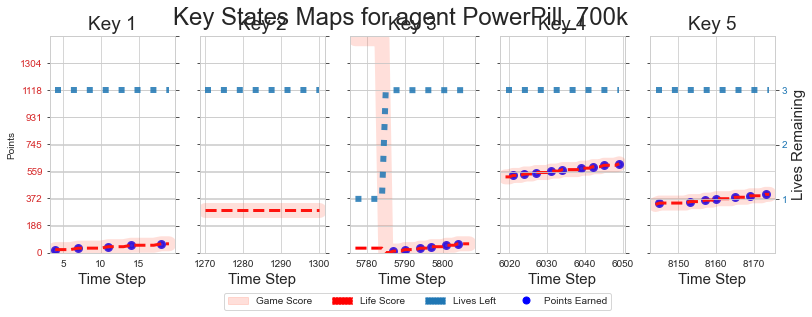

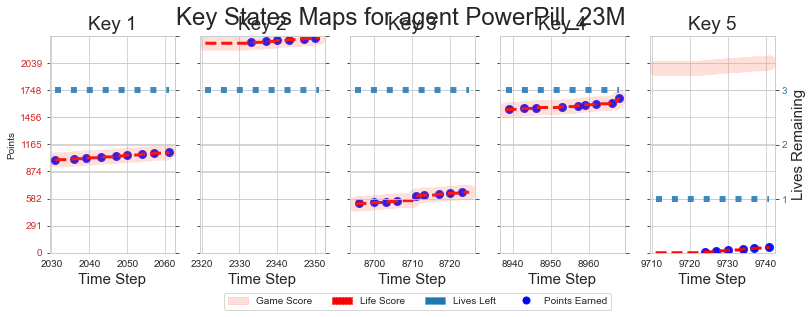

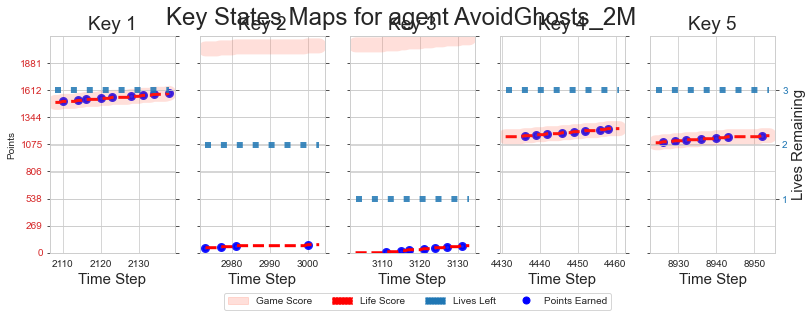

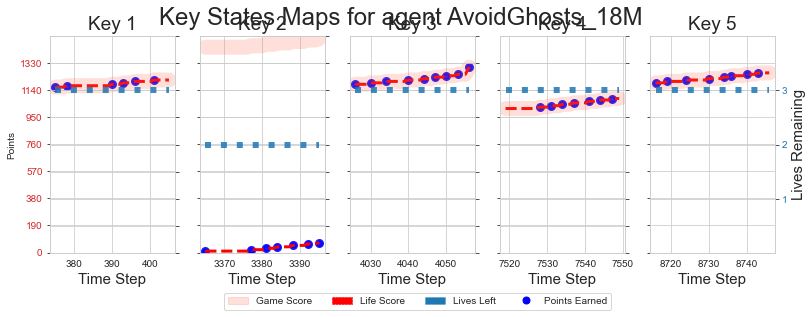

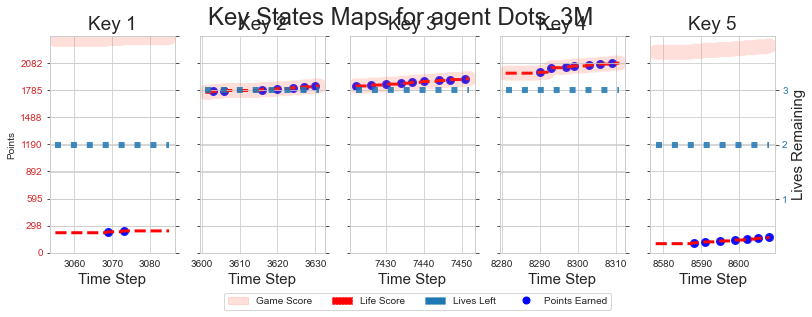

KeyboardInterrupt: 

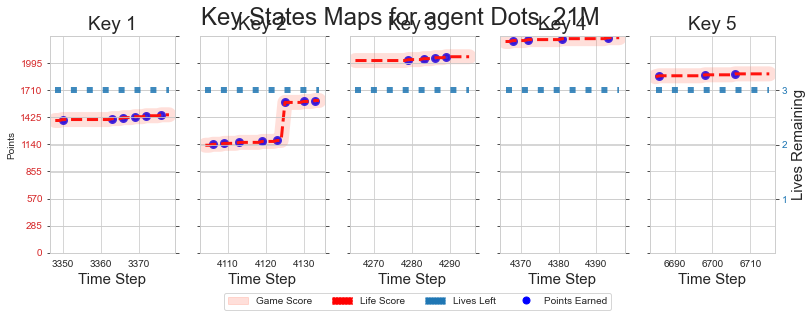

In [9]:
sns.set_style("whitegrid")



for index, agent in enumerate(evalKeysDFsList):
    fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(13,4), sharey=True)
    axes[0].set_ylabel('Points')
    for k_i, i in enumerate(agent.keyNum.unique()):
        color = 'tab:red'
        axes[k_i].plot("state", "episode_reward", data = agent[agent['keyNum']==i], c='red', linewidth=3, \
                   linestyle='--', label = 'rewards this life')
        axes[k_i].plot("state", "epoch_reward", data = agent[agent['keyNum']==i], c='tomato', linewidth=15, \
                   alpha = 0.2, label = 'rewards this game')
        axes[k_i].scatter("state", "episode_reward", data = agent.loc[(agent['keyNum']==i) & \
                  (agent['reward']>0)], c='blue', linewidth=3, alpha = 0.9, label="points scored")
        n = agent['epoch_reward'].max()+20
        axes[k_i].set_ylim(-5,n)
        axes[k_i].set_yticks([0, n/8, 2*(n/8), 3*(n/8), 4*(n/8), 5*(n/8), 6*(n/8), 7*(n/8)])
        axes[k_i].tick_params(axis='y', labelcolor=color)
        axes[k_i].set_title("Key " + str(int(i)), fontsize=fnt2)
        axes[k_i].set_xlabel("Time Step", fontsize=fnt3)


        ax2 = axes[k_i].twinx() # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'

        ax2.plot("state", "lives", data = agent.loc[(agent['keyNum']==i)], c=color, linewidth=6, \
                 alpha = 0.86, linestyle=":")
        ax2.set_ylim(0,4)
        if k_i == 4:
            ax2.set_xlabel=None
#             ax2.set_xticklabels([])
            ax2.tick_params(axis='y', labelcolor=color)
            ax2.set_yticks([1,2,3])
#             ax2.set_ylabels(['1','2','3'])
            ax2.set_ylabel('Lives Remaining', fontsize=fnt3)
        else:
            ax2.set_xlabel=None
            ax2.set_yticklabels([])
            ax2.set_ylabel=None
#             ax2.set_xticklabels([])

    a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='blue',ms = 7, \
    markerfacecolor="blue", alpha=1.00, label = "Points Earned")

    legend_elements = [Patch(facecolor='tomato', edgecolor='tomato', alpha=0.2, label='Game Score'), \
      Patch(facecolor='red', edgecolor='red', linestyle='--', lw = 0.6, label='Life Score'), \
        Patch(facecolor='tab:blue', edgecolor='tab:blue', linestyle=":", lw = 0.6, label='Lives Left'), \
        a]

    fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, 0.005), ncol=4)
    fig.suptitle("Key States Maps for agent " + names[index], fontsize=fnt)
#         fig.legend()
    if saveFigs:
        filename = names[index] + "SubwayMapSitch_DualAxes" + str(i) + ".png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
cols=['r','r','g','g','b','b','y','y','b','r','m','m','lavender']

for index, agent in enumerate(evalKeysDFsList):
    if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2") or (names[index]=="Standard_2M"):
        fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(13,4), sharey=True)
        for agent_index,i in enumerate(agent.keyNum.unique()):
            tmp = agent[agent['keyNum']==i]
    #         temp = tmp[tmp['beforeLifeLoss']==True]
            tmp
            axes[agent_index].plot("state", "action", data = tmp, marker='o', c="black")
    #         plt.xticks(agent[agent['keyNum']==i]['state'], [1,2,3,4,5,"Dead"])
            axes[agent_index].set_title("Key " + str(agent_index+1))
            axes[agent_index].set_xlabel("Time Step")
        plt.yticks([1,2,3,4], action_names)
        plt.suptitle(names[index] +"'s Actions in Key Situations")
        plt.tight_layout()
        fig.suptitle("Actions Taken in Key States for Agent " + names[index])
    #         fig.legend()
        if saveFigs:
            filename = "ActionsLineGraph_KeyStates_" + str(names[index]) + ".png"
            filepath = os.path.join(save_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=100, bbox_inches='tight')
        plt.show()


In [ ]:
sns.set_style("whitegrid")
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta',
         'red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green',
          'magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
for index, agentDF in enumerate(evalDFsList):
    if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
        plt.figure(figsize=(3.2, 5))
        agent = agentDF
        agent['neg_y'] = agent['pacman_coord_y']*(-1)
        plt.scatter("pacman_coord_x", "neg_y", alpha=0.07, data=agent, c= colors[index],  label ="")
        plt.xlabel('x-coordinate', fontsize=11)
        plt.ylabel('y-coordinate', fontsize=11)
        plt.title(names[index] + ' Ms. Pacman Location', fontsize=11)
        plt.tight_layout()
        if saveFigs:
            filename = names[index] + "PacmanMovementMap_OG_Summary.png"
            filepath = os.path.join(save_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=100, bbox_inches='tight')
        plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']

rewards = ["dot", "powerPill", "bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    axs[index].scatter("epoch","epoch_step",c="coral",s=1,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        rew = rewards[indexR]
        if rewAmnt == 10 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 \
        or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110:
            axs[index].scatter("epoch","episode_step",s=10,c="magenta",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 50 or rewAmnt == 250:
            axs[index].scatter("epoch","episode_step",s=50,c="purple",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 100 or rewAmnt == 110:
            axs[index].scatter("epoch","episode_step",s="reward",c="yellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 200 or rewAmnt == 210 or rewAmnt == 250:
            axs[index].scatter("epoch","episode_step",s="reward",c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 400 or rewAmnt == 410:
            axs[index].scatter("epoch","episode_step",s="reward",c="dodgerblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 500 or rewAmnt == 510:
            axs[index].scatter("epoch","episode_step",s="reward",c="pink",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 700 or rewAmnt == 710:
            axs[index].scatter("epoch","episode_step",s="reward",c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 800 or rewAmnt == 810:
            axs[index].scatter("epoch","episode_step",s="reward",c="greenyellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1000 or rewAmnt == 1010:
            axs[index].scatter("epoch","episode_step",s="reward",c="lavender",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1600 or rewAmnt == 1610:
            axs[index].scatter("epoch","episode_step",s="reward",c="whitesmoke",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 2000 or rewAmnt == 2010:
            axs[index].scatter("epoch","episode_step",s="reward",c="lawngreen",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 5000 or rewAmnt == 5010:
            axs[index].scatter("epoch","episode_step",s="reward",c="paleblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        
    axs[index].set_xlabel('Game Number', fontsize=11)
    axs[0].set_ylabel('Game Step', fontsize=11)
    axs[1].set_ylabel('Game Step', fontsize=11)
    axs[index].set_title(names[index] + ' Reward Distribution', fontsize=11)
    column = agent["epoch_step"]

i = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='magenta',ms = 4, \
markerfacecolor="magenta", alpha=1.00, label = "Dot")

a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='purple',ms = 4, \
markerfacecolor="purple", alpha=1.00, label = "Power Pill")
# 200 - slategrey
b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='slategrey',ms = 4.0, \
markerfacecolor="slategrey", alpha=1.00, label = "Fruit or Ghost1")
# 400 - dodgerblue
c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='dodgerblue',ms = 8.0, \
markerfacecolor="dodgerblue", alpha=1.00, label = "Ghost2")
# 100 - yellow
d = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='yellow',ms = 2.0, \
markerfacecolor="yellow", alpha=1.00, label = "Cherry")
# 800 - greenyellow
h = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='greenyellow',ms = 10.0, \
markerfacecolor="greenyellow", alpha=1.00, label = "Ghost3")

legend_elements = [i,a,b,c,d,h]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.75, 0.005), ncol=6)
    
plt.tight_layout()

if saveFigs:
    filename = "All_PacmanPointsOG_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["dot", "powerPill", "bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(6,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c="coral",s=3,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        if rewAmnt == 10 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 \
        or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110:
            plt.scatter("epoch","episode_step",s=10,c="magenta",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 50 or rewAmnt == 250:
            plt.scatter("epoch","episode_step",s=50,c="purple",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 100 or rewAmnt == 110:
            plt.scatter("epoch","episode_step",s="reward",c="yellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 200 or rewAmnt == 210 or rewAmnt == 250:
            plt.scatter("epoch","episode_step",s="reward",c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 400 or rewAmnt == 410:
            plt.scatter("epoch","episode_step",s="reward",c="dodgerblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 500 or rewAmnt == 510:
            plt.scatter("epoch","episode_step",s="reward",c="pink",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 700 or rewAmnt == 710:
            plt.scatter("epoch","episode_step",s="reward",c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 800 or rewAmnt == 810:
            plt.scatter("epoch","episode_step",s="reward",c="greenyellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1000 or rewAmnt == 1010:
            plt.scatter("epoch","episode_step",s="reward",c="lavender",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1600 or rewAmnt == 1610:
            plt.scatter("epoch","episode_step",s="reward",c="whitesmoke",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 2000 or rewAmnt == 2010:
            plt.scatter("epoch","episode_step",s="reward",c="lawngreen",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 5000 or rewAmnt == 5010:
            plt.scatter("epoch","episode_step",s="reward",c="paleblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        
    plt.xlabel('Game Number', fontsize=11)
    plt.ylabel('Game Step', fontsize=11)
    plt.title(names[index] + ' Reward Distribution', fontsize=11)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)
    
    i = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='magenta',ms = 4, \
    markerfacecolor="magenta", alpha=1.00, label = "Dot")

    a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='purple',ms = 4, \
    markerfacecolor="purple", alpha=1.00, label = "Power Pill")
    # 200 - slategrey
    b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='slategrey',ms = 4.0, \
    markerfacecolor="slategrey", alpha=1.00, label = "Fruit or Ghost1")
    # 400 - dodgerblue
    c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='dodgerblue',ms = 8.0, \
    markerfacecolor="dodgerblue", alpha=1.00, label = "Ghost2")
    # 100 - yellow
    d = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='yellow',ms = 2.0, \
    markerfacecolor="yellow", alpha=1.00, label = "Cherry")
    # 800 - greenyellow
    h = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='greenyellow',ms = 10.0, \
    markerfacecolor="greenyellow", alpha=1.00, label = "Ghost3")

    legend_elements = [i,a,b,c,d,h]

    plt.legend(handles=legend_elements, bbox_to_anchor= (1.1, 0.5), ncol=1)
    
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPointsOG_Summary_WithLegend.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()
    
    
    
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["dot", "powerPill", "bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(4,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c="coral",s=3,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        if rewAmnt == 10 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 \
        or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110:
            plt.scatter("epoch","episode_step",s=10,c="magenta",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 50 or rewAmnt == 250:
            plt.scatter("epoch","episode_step",s=50,c="purple",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 100 or rewAmnt == 110:
            plt.scatter("epoch","episode_step",s="reward",c="yellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 200 or rewAmnt == 210 or rewAmnt == 250:
            plt.scatter("epoch","episode_step",s="reward",c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 400 or rewAmnt == 410:
            plt.scatter("epoch","episode_step",s="reward",c="dodgerblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 500 or rewAmnt == 510:
            plt.scatter("epoch","episode_step",s="reward",c="pink",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 700 or rewAmnt == 710:
            plt.scatter("epoch","episode_step",s="reward",c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 800 or rewAmnt == 810:
            plt.scatter("epoch","episode_step",s="reward",c="greenyellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1000 or rewAmnt == 1010:
            plt.scatter("epoch","episode_step",s="reward",c="lavender",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1600 or rewAmnt == 1610:
            plt.scatter("epoch","episode_step",s="reward",c="whitesmoke",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 2000 or rewAmnt == 2010:
            plt.scatter("epoch","episode_step",s="reward",c="lawngreen",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 5000 or rewAmnt == 5010:
            plt.scatter("epoch","episode_step",s="reward",c="paleblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        
    plt.xlabel('Game Number', fontsize=11)
    plt.ylabel('Game Step', fontsize=11)
    plt.title(names[index] + ' Reward Distribution', fontsize=11)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)
    
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPointsOG_Summary_NoLegend.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["dot", "powerPill", "bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    axs[index].scatter("epoch","epoch_step",c="coral",s=1,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        if rewAmnt == 10 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 \
        or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110 or rewAmnt == 110:
            axs[index].scatter("epoch","episode_step",s=10,c="magenta",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 50 or rewAmnt == 250:
            axs[index].scatter("epoch","episode_step",s=50,c="purple",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 100 or rewAmnt == 110:
            axs[index].scatter("epoch","episode_step",s="reward",c="yellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 200 or rewAmnt == 210 or rewAmnt == 250:
            axs[index].scatter("epoch","episode_step",s="reward",c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 400 or rewAmnt == 410:
            axs[index].scatter("epoch","episode_step",s="reward",c="dodgerblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 500 or rewAmnt == 510:
            axs[index].scatter("epoch","episode_step",s="reward",c="pink",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 700 or rewAmnt == 710:
            axs[index].scatter("epoch","episode_step",s="reward",c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 800 or rewAmnt == 810:
            axs[index].scatter("epoch","episode_step",s="reward",c="greenyellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1000 or rewAmnt == 1010:
            axs[index].scatter("epoch","episode_step",s="reward",c="lavender",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 1600 or rewAmnt == 1610:
            axs[index].scatter("epoch","episode_step",s="reward",c="whitesmoke",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 2000 or rewAmnt == 2010:
            axs[index].scatter("epoch","episode_step",s="reward",c="lawngreen",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        if rewAmnt == 5000 or rewAmnt == 5010:
            axs[index].scatter("epoch","episode_step",s="reward",c="paleblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    axs[index].set_xlabel('Game Number', fontsize=11)
    axs[0].set_ylabel('Game Step', fontsize=11)
    axs[1].set_ylabel('Game Step', fontsize=11)
    axs[index].set_title(names[index] + ' Reward Distribution', fontsize=11)
    column = agent["epoch_step"]
#     axs[index].set_ylim(0,column.max()+10)
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
    
plt.tight_layout()

if saveFigs:
    filename = "All_PacmanPointsOG_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# Bars by lives
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharex=True, sharey=True)
axs = axes.T.flatten()
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    axs[index].scatter("epoch_step","epoch",c='lives',cmap=my_cmap,data=agent, label ="")
    axs[0].set_ylabel('Game Number', fontsize=11)
    axs[1].set_ylabel('Game Number', fontsize=11)
    axs[1].set_xlabel('Game Step', fontsize=11)
    axs[3].set_xlabel('Game Step', fontsize=11)
    axs[5].set_xlabel('Game Step', fontsize=11)
    axs[7].set_xlabel('Game Step', fontsize=11)
    axs[9].set_xlabel('Game Step', fontsize=11)
    axs[index].set_title(names[index] + ' Reward Distribution', fontsize=11)
    column = agent["epoch_step"]

legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
  Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
    Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left')]
fig.legend(handles=legend_elements, bbox_to_anchor= (0.65, 0.005), ncol=3)
    
plt.tight_layout()

if saveFigs:
    filename = names[index] + "PacmanLivesBars_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
def Reverse(lst):
    return [ele for ele in reversed(lst)]
plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','greenyellow', 'white', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
# HEREHERE
# Dot - 10
#  Energy Pill (Power Pill) - 50
#  Cherry - 100
#  Strawberry - 200 
#  Orange - 500
#  Pretzel - 700
#  Apple - 1,000
#  Pear - 2,000
#  Banana - 5,000
#  1st Blue Ghost - 200
#  2nd Blue Ghost - 400
#  3rd Blue Ghost - 800
#  4th Blue Ghost - 1,600


for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(6,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
    temp = agent[agent['reward']==50]
    counter = 0
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        counter = counter + 1
        col = 'purple'
        rew = "PowerPill"
        plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)

    temp = agent[agent['reward']>50]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = colors2[indexR]
        rew = rewards[indexR]
        if rewAmnt == 100 or rewAmnt == 110:
            plt.scatter("epoch","episode_step",s="reward",c="yellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 200 or rewAmnt == 210:
            plt.scatter("epoch","episode_step",s="reward",c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 400 or rewAmnt == 410:
            plt.scatter("epoch","episode_step",s="reward",c="dodgerblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 500 or rewAmnt == 510:
            plt.scatter("epoch","episode_step",s="reward",c="pink",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 700 or rewAmnt == 710:
            plt.scatter("epoch","episode_step",s="reward",c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 800 or rewAmnt == 810:
            plt.scatter("epoch","episode_step",s="reward",c="greenyellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 1000 or rewAmnt == 1010:
            plt.scatter("epoch","episode_step",s="reward",c="lavender",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 1600 or rewAmnt == 1610:
            plt.scatter("epoch","episode_step",s="reward",c="whitesmoke",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 2000 or rewAmnt == 2010:
            plt.scatter("epoch","episode_step",s="reward",c="lawngreen",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 5000 or rewAmnt == 5010:
            plt.scatter("epoch","episode_step",s="reward",c="paleblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 250:
            plt.scatter("epoch","episode_step",s=200,c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
            if counter < 4:
                plt.scatter("epoch","episode_step",s=50,c="purple",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        else:
            print(rewAmnt)
            print(rew)
            plt.scatter("epoch","episode_step",s=3000,c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    plt.xlabel('Game Number', fontsize=fnt3)
    plt.ylabel('Game Step', fontsize=fnt3)
    plt.title(names[index] + ' Reward Distribution', fontsize=fnt2)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
    a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='purple',ms = 4, \
    markerfacecolor="purple", alpha=1.00, label = "Power Pill")
    # 200 - slategrey
    b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='slategrey',ms = 4.0, \
    markerfacecolor="slategrey", alpha=1.00, label = "Fruit or Ghost1")
    # 400 - dodgerblue
    c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='dodgerblue',ms = 8.0, \
    markerfacecolor="dodgerblue", alpha=1.00, label = "Ghost2")
    # 100 - yellow
    d = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='yellow',ms = 2.0, \
    markerfacecolor="yellow", alpha=1.00, label = "Cherry")
    # 800 - greenyellow
    h = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='greenyellow',ms = 10.0, \
    markerfacecolor="greenyellow", alpha=1.00, label = "Ghost3")

    legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
      Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
        Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
        a,b,c,d,h]

    plt.legend(handles=legend_elements, bbox_to_anchor= (1.1, 0.5), ncol=1)
        
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPointsOG_Summary_Lives_WithLegend.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()
    
    
    
    
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','greenyellow', 'white', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(4,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
    temp = agent[agent['reward']==50]
    counter = 0
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        counter = counter + 1
        col = 'purple'
        rew = "PowerPill"
        plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)

    temp = agent[agent['reward']>50]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = colors2[indexR]
        rew = rewards[indexR]
        if rewAmnt == 100 or rewAmnt == 110:
            plt.scatter("epoch","episode_step",s="reward",c="yellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 200 or rewAmnt == 210:
            plt.scatter("epoch","episode_step",s="reward",c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 400 or rewAmnt == 410:
            plt.scatter("epoch","episode_step",s="reward",c="dodgerblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 500 or rewAmnt == 510:
            plt.scatter("epoch","episode_step",s="reward",c="pink",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 700 or rewAmnt == 710:
            plt.scatter("epoch","episode_step",s="reward",c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 800 or rewAmnt == 810:
            plt.scatter("epoch","episode_step",s="reward",c="greenyellow",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 1000 or rewAmnt == 1010:
            plt.scatter("epoch","episode_step",s="reward",c="lavender",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 1600 or rewAmnt == 1610:
            plt.scatter("epoch","episode_step",s="reward",c="whitesmoke",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 2000 or rewAmnt == 2010:
            plt.scatter("epoch","episode_step",s="reward",c="lawngreen",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 5000 or rewAmnt == 5010:
            plt.scatter("epoch","episode_step",s="reward",c="paleblue",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        elif rewAmnt == 250:
            plt.scatter("epoch","episode_step",s=200,c="slategrey",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
            if counter < 4:
                plt.scatter("epoch","episode_step",s=50,c="purple",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        else:
            print(rewAmnt)
            print(rew)
            plt.scatter("epoch","episode_step",s=3000,c="black",data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    plt.xlabel('Game Number', fontsize=fnt3)
    plt.ylabel('Game Step', fontsize=fnt3)
    plt.title(names[index] + ' Reward Distribution', fontsize=fnt2)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)
        
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPointsOG_Summary_Lives_NoLegend.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
# colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
# colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','greenyellow', 'white', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
# sns.set_style('darkgrid')
# rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
# my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])

# # Dot - 10
# #  Energy Pill (Power Pill) - 50
# #  Cherry - 100
# #  Strawberry - 200 
# #  Orange - 500
# #  Pretzel - 700
# #  Apple - 1,000
# #  Pear - 2,000
# #  Banana - 5,000
# #  1st Blue Ghost - 200
# #  2nd Blue Ghost - 400
# #  3rd Blue Ghost - 800
# #  4th Blue Ghost - 1,600


# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
#         plt.figure(figsize=(7.1,8))
#         agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#         plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
#         temp = agent[agent['reward']>50]
#         for indexR, rewAmnt in sorted(enumerate(temp.reward.unique())):
#             col = colors2[indexR]
#             rew = rewards[indexR]
#             print(rewAmnt)
#             print(colors2[indexR])
#             plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
#         temp = agent[agent['reward']==50]
#         for indexR, rewAmnt in enumerate(temp.reward.unique()):
#             col = 'purple'
#             rew = "PowerPill"
#             plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
#         plt.xlabel('Game Number', fontsize=11)
#         plt.ylabel('Game Step', fontsize=11)
#         plt.title(names[index] + ' Reward Distribution', fontsize=11)
#         column = allEvalsDF["epoch_step"]
#         plt.ylim(0,1050)

#         a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='purple',ms = 4, \
#         markerfacecolor="purple", alpha=1.00, label = "Power Pill")
#         # 200 - slategrey
#         b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='slategrey',ms = 4.0, \
#         markerfacecolor="slategrey", alpha=1.00, label = "Fruit or Ghost1")
#         # 400 - dodgerblue
#         c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='dodgerblue',ms = 8.0, \
#         markerfacecolor="dodgerblue", alpha=1.00, label = "Ghost2")
#         # 100 - yellow
#         d = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='yellow',ms = 2.0, \
#         markerfacecolor="yellow", alpha=1.00, label = "Cherry")
#         # 250 - orange
#         e = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='orange',ms = 4.5, \
#         markerfacecolor="orange", alpha=1.00, label = "Power Pill and Ghost1 or Fruit")
#         # 410 - red
#         f = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='red',ms = 8.1, \
#         markerfacecolor="red", alpha=1.00, label = "Dot and Ghost2")
#         # 110 - green
#         g = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='green',ms = 2.1, \
#         markerfacecolor="green", alpha=1.00, label = "Dot and Cherry")
#         # 800 - greenyellow
#         h = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='greenyellow',ms = 10.0, \
#         markerfacecolor="greenyellow", alpha=1.00, label = "Ghost3")
#         # 210 - purple
#         i = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='white',ms = 8.1, \
#         markerfacecolor="white", alpha=1.00, label = "Dot and Fruit or Ghost1")

#         legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
#           Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
#             Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
#             a,b,c,d,e,f,g,h,i]

#         plt.legend(handles=legend_elements, bbox_to_anchor= (1.1, 0.5), ncol=1)

#         plt.tight_layout()

#         if saveFigs:
#             filename = names[index] + "PacmanPointsOG_Summary_Lives_WithLegend.png"
#             filepath = os.path.join(save_path, filename)
#             if not os.path.isdir(save_path):
#                 os.mkdir(save_path)
#             plt.savefig(filepath, dpi=100, bbox_inches='tight')
#         plt.show()
        
# colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
# colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','greenyellow', 'white', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
# sns.set_style('darkgrid')
# rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
# my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])

# # Dot - 10
# #  Energy Pill (Power Pill) - 50
# #  Cherry - 100
# #  Strawberry - 200 
# #  Orange - 500
# #  Pretzel - 700
# #  Apple - 1,000
# #  Pear - 2,000
# #  Banana - 5,000
# #  1st Blue Ghost - 200
# #  2nd Blue Ghost - 400
# #  3rd Blue Ghost - 800
# #  4th Blue Ghost - 1,600


# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
#         plt.figure(figsize=(4,8))
#         agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#         plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
#         temp = agent[agent['reward']>50]
#         for indexR, rewAmnt in sorted(enumerate(temp.reward.unique())):
#             col = colors2[indexR]
#             rew = rewards[indexR]
#             print(rewAmnt)
#             print(colors2[indexR])
#             plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
#         temp = agent[agent['reward']==50]
#         for indexR, rewAmnt in enumerate(temp.reward.unique()):
#             col = 'purple'
#             rew = "PowerPill"
#             plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
#         plt.xlabel('Game Number', fontsize=11)
#         plt.ylabel('Game Step', fontsize=11)
#         plt.title(names[index] + ' Reward Distribution', fontsize=11)
#         column = allEvalsDF["epoch_step"]
#         plt.ylim(0,1050)

#         if saveFigs:
#             filename = names[index] + "PacmanPointsOG_Summary_Lives_NoLegend.png"
#             filepath = os.path.join(save_path, filename)
#             if not os.path.isdir(save_path):
#                 os.mkdir(save_path)
#             plt.savefig(filepath, dpi=100, bbox_inches='tight')
#         plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap([ "m", "dodgerblue","darkorange"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(4,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
#     temp = agent[agent['reward']>50]
#     for indexR, rewAmnt in enumerate(temp.reward.unique()):
#         col = colors2[indexR]
#         rew = rewards[indexR]
#         plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    temp = agent[agent['reward']==50]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = 'purple'
        rew = "PowerPill"
        plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    temp = agent[agent['reward']==250]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = 'purple'
        rew = "PowerPill"
        plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    plt.xlabel('Game Number', fontsize=fnt3)
    plt.ylabel('Game Step', fontsize=fnt3)
    plt.title(names[index] + ' Reward Distribution', fontsize=fnt2)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)

    c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='purple',ms = 6, markerfacecolor="purple", alpha=1.00, label = "Ate Power Pill")

    legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
        Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
       Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
        c]

    plt.legend(handles=legend_elements, bbox_to_anchor= (0.95, -0.07), ncol=2)

    
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPowerPillConsumption.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Lives Left')
axs[3].set_xlabel('Lives Left')
axs[5].set_xlabel('Lives Left')
axs[7].set_xlabel('Lives Left')
axs[9].set_xlabel('Lives Left')
axs[0].set_ylabel('Key Situation Number')
axs[1].set_ylabel('Key Situation Number')
for index, agent in enumerate(evalKeysDFsList):
    axs[index].scatter("lives", "keyNum", s=55, c= 'b', data = agent)
    axs[index].scatter("lives", "keyNum", s=15, data = agent[agent['beforeLifeLoss']>0], color = "red")
    axs[index].set_yticks([1,2,3,4,5],)
    axs[index].set_xticks([1,2,3],['1','2','3'])
    axs[index].set_title(names[index])

fig.suptitle("Lives Left in Key Situations")


b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor="b", markerfacecolor="b", alpha=1.00)
c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor="b", markerfacecolor="r", alpha=1.00)


fig.legend([b,c], ["Lives Left in Key State", "Life Lost"], bbox_to_anchor= (0.6, .08), ncol=2, fontsize='small')

# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))
if saveFigs:
    filename = "LiveVkeyStates.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Time Step')
axs[3].set_xlabel('Time Step')
axs[5].set_xlabel('Time Step')
axs[7].set_xlabel('Time Step')
axs[9].set_xlabel('Time Step')
# axs[0].set_ylabel('Total Rewards Earned')
# axs[1].set_ylabel('Total Rewards Earned')
for index, agent in enumerate(evalKeysDFsList):
    axs[index].plot("state", "total_reward", data = evalDFsList[index], c='b', label = 'Total Reward')
    axs[index].scatter('state', 'total_reward', data = evalKeysDFsList[index], s=48, c='coral', label = 'Key Situation')
    axs[index].set_title(names[index])
axs[0].legend(loc="best")
axs[9].legend(loc="best")

fig.suptitle('Location of Key States in Evaluation Set')

# b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor="coral", markerfacecolor="coral", alpha=1.00)

# fig.legend([b], ["Key State"], bbox_to_anchor= (0.54, .94), fontsize='small')


if saveFigs:
    filename = "KeyStatesInTotalReward.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# Bars by lives

my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharex=True, sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Game Step', fontsize=fnt3)
axs[3].set_xlabel('Game Step', fontsize=fnt3)
axs[5].set_xlabel('Game Step', fontsize=fnt3)
axs[7].set_xlabel('Game Step', fontsize=fnt3)
axs[9].set_xlabel('Game Step', fontsize=fnt3)
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    agent_key = agent[agent['key_state']==True]
    axs[index].scatter("epoch_step","epoch",c='lives',s=5,cmap=my_cmap,data=agent, label ="")
    axs[index].scatter("epoch_step","epoch",color='r',data=agent_key,marker='X',s=150,label ="Key States")
    axs[index].set_ylabel('Game Number', fontsize=fnt3)
    axs[index].set_title(names[index] + ' Key States', fontsize=fnt)
    column = agent["epoch_step"]
#     axs[index].set_xlim(0,column.max()+10)

c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='X', markeredgecolor='none',ms = 10, markerfacecolor="r", alpha=1.00, label = "Key States")

legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
    Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
    Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
    c]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.705, 0.01), ncol=4)
    
plt.tight_layout()

if saveFigs:
    filename = names[index] + "PacmanLivesBars_withKeys_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

0.0
PowerPill_700k
1.0
PowerPill_23M
2.0
AvoidGhosts_2M
3.0
AvoidGhosts_18M
4.0
Dots_3M
5.0
Dots_21M
6.0
Standard_300k
7.0
Standard_2M
8.0
Standard_23M_run1
9.0
Standard_23M_run2


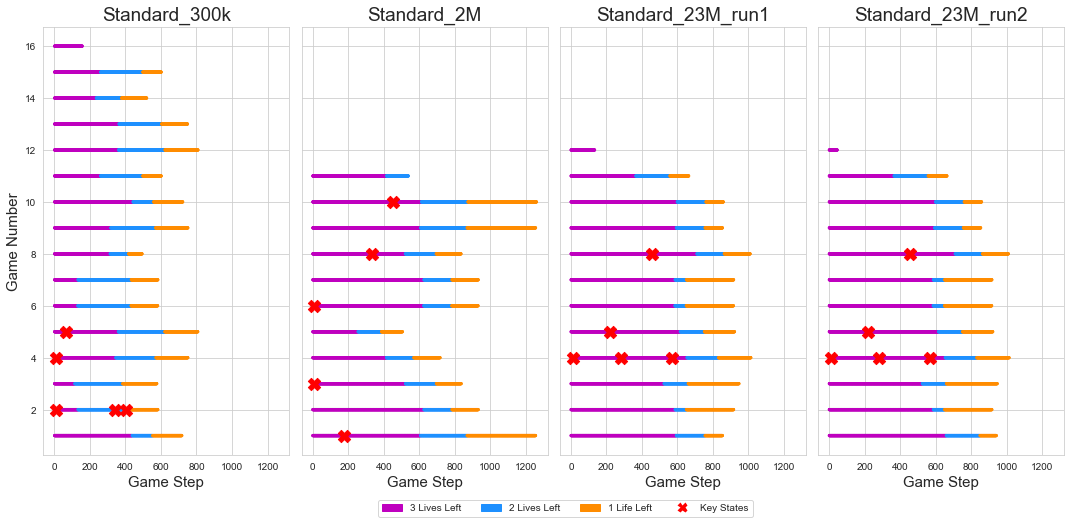

In [14]:
# Bars by lives

my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,7), sharex=True, sharey=True)
axs = axes.T.flatten()
axs[0].set_xlabel('Game Step', fontsize=fnt3)
axs[1].set_xlabel('Game Step', fontsize=fnt3)
axs[2].set_xlabel('Game Step', fontsize=fnt3)
axs[3].set_xlabel('Game Step', fontsize=fnt3)
# axs[9].set_xlabel('Game Step')
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    print(aNum)
    print(names[index])
    if aNum > 5.0:
        agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
        agent_key = agent[agent['key_state']==True]
        axs[index-6].scatter("epoch_step","epoch",c='lives',s=5,cmap=my_cmap,data=agent, label ="")
        axs[index-6].scatter("epoch_step","epoch",color='r',data=agent_key,marker='X',s=150,label ="Key States")
        axs[0].set_ylabel('Game Number', fontsize=fnt3)
        axs[index-6].set_title(names[index], fontsize=fnt2)
        column = agent["epoch_step"]
    #     axs[index].set_xlim(0,column.max()+10)

c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='X', markeredgecolor='none',ms = 10, markerfacecolor="r", alpha=1.00, label = "Key States")

legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
    Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
    Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
    c]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.705, 0.01), ncol=4)
    
plt.tight_layout()

if saveFigs:
    filename = "PacmanLivesBars_withKeys_STDOnly_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
if verbose: 
    for index, aNum in enumerate(allEvalsDF.agentNum.unique()):   
        temp = allEvalsDF[allEvalsDF['agentNum']==aNum]
        print("Temp: " + str(temp.agentNum.unique()))
        temp2 = temp[temp['keyNum']>0]
        print("Key States in Temp: " + str(temp2.keyNum.unique()))
        temp3 = temp2[temp2['beforeLifeLoss']==1]
        print(temp3["keyNum"])
    

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Life')
axs[3].set_xlabel('Life')
axs[5].set_xlabel('Life')
axs[7].set_xlabel('Life')
axs[9].set_xlabel('Life')
axs[0].set_ylabel('Percent of Actions Taken in Game')
axs[1].set_ylabel('Percent of Actions Taken in Game')
for index, num in enumerate(evalDFsList):
    df = num
    
    # Make action Distributions
    action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
    def label_race (row):
       if row['action'] == 1 :
          return action_names[0]
       if row['action'] == 2 :scor
          return action_names[1]
       if row['action'] == 3:
          return action_names[2]
       if row['action']  == 4:
          return action_names[3]
       return action_names[3]

    df['action_name'] = df.apply (lambda row: label_race(row), axis=1).copy()

    # Can I get the sums of each action for each epoch?
    actions_df = pd.DataFrame(df.pivot_table(index='epoch',columns='action_name',aggfunc=sum))
#     print(names[index])
    actions_df.fillna(0, inplace=True)
#     print(actions_df)
    action_subset = pd.DataFrame(actions_df['action'])
    action_subset['epoch'] = range(1, len(action_subset) + 1)
    action_subset.set_index('epoch',drop=False,inplace=True)
    
    actions_only = action_subset.drop(['epoch'], axis=1)
    
    data_perc = actions_only.divide(actions_only.sum(axis=1), axis=0)
    axs[index].stackplot(range(1,len(data_perc)+1), data_perc['DOWN'], 
                  data_perc['LEFT'], 
                  data_perc['RIGHT'], 
                  data_perc['UP'], 
                  labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'])
    axs[index].set_xlim((1,len(data_perc)))
    axs[index].set_ylim((0,1))
    axs[index].set_title(names[index])

    

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Down'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Left'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Right'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Up')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.64, 0.078), ncol=4)

plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0],['','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
fig.suptitle('Actions Per Game')
if saveFigs:
    filename = "AllStackedActionsPerGame.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

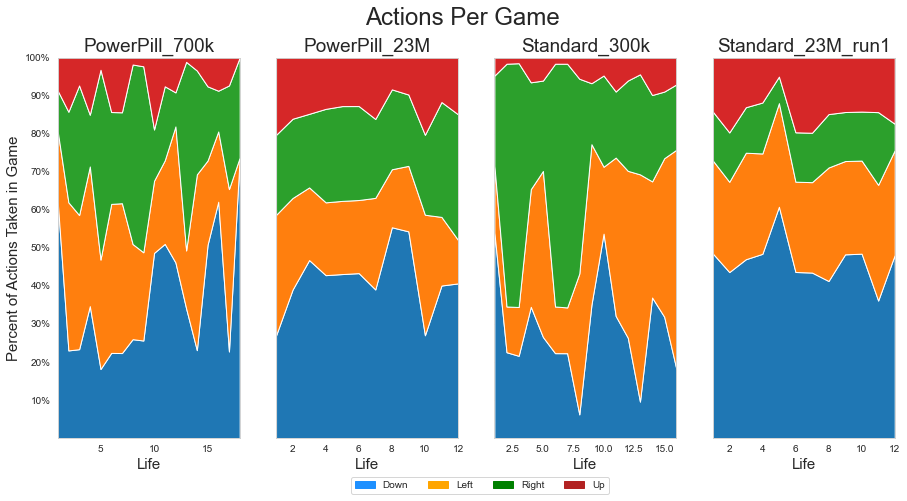

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,7), sharey=True)
axs = axes.T.flatten()
axs[0].set_xlabel('Life', fontsize=fnt3)
axs[1].set_xlabel('Life', fontsize=fnt3)
axs[2].set_xlabel('Life', fontsize=fnt3)
axs[3].set_xlabel('Life', fontsize=fnt3)
# axs[9].set_xlabel('Life')
axs[0].set_ylabel('Percent of Actions Taken in Game', fontsize=fnt3)
# axs[1].set_ylabel('Percent of Actions Taken in Game')
index = 0
for indexN, num in enumerate(evalDFsList):
    df = num
    if indexN == 0 or indexN == 1 or indexN == 6 or indexN == 8:
    
        # Make action Distributions
        action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
        def label_race (row):
           if row['action'] == 1 :
              return action_names[0]
           if row['action'] == 2 :
              return action_names[1]
           if row['action'] == 3:
              return action_names[2]
           if row['action']  == 4:
              return action_names[3]
           return action_names[3]

        df['action_name'] = df.apply (lambda row: label_race(row), axis=1).copy()

        # Can I get the sums of each action for each epoch?
        actions_df = pd.DataFrame(df.pivot_table(index='epoch',columns='action_name',aggfunc=sum))
    #     print(names[index])
        actions_df.fillna(0, inplace=True)
    #     print(actions_df)
        action_subset = pd.DataFrame(actions_df['action'])
        action_subset['epoch'] = range(1, len(action_subset) + 1)
        action_subset.set_index('epoch',drop=False,inplace=True)

        actions_only = action_subset.drop(['epoch'], axis=1)

        data_perc = actions_only.divide(actions_only.sum(axis=1), axis=0)
        axs[index].stackplot(range(1,len(data_perc)+1), data_perc['DOWN'], 
                      data_perc['LEFT'], 
                      data_perc['RIGHT'], 
                      data_perc['UP'], 
                      labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'])
        axs[index].set_xlim((1,len(data_perc)))
        axs[index].set_ylim((0,1))
        axs[index].set_title(names[indexN], fontsize=fnt2)
        index = index +1

    

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Down'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Left'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Right'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Up')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.64, 0.058), ncol=4)

plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0],['','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
fig.suptitle('Actions Per Game', fontsize=fnt)
if saveFigs:
    filename = "Selected_StackedActionsPerGame.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

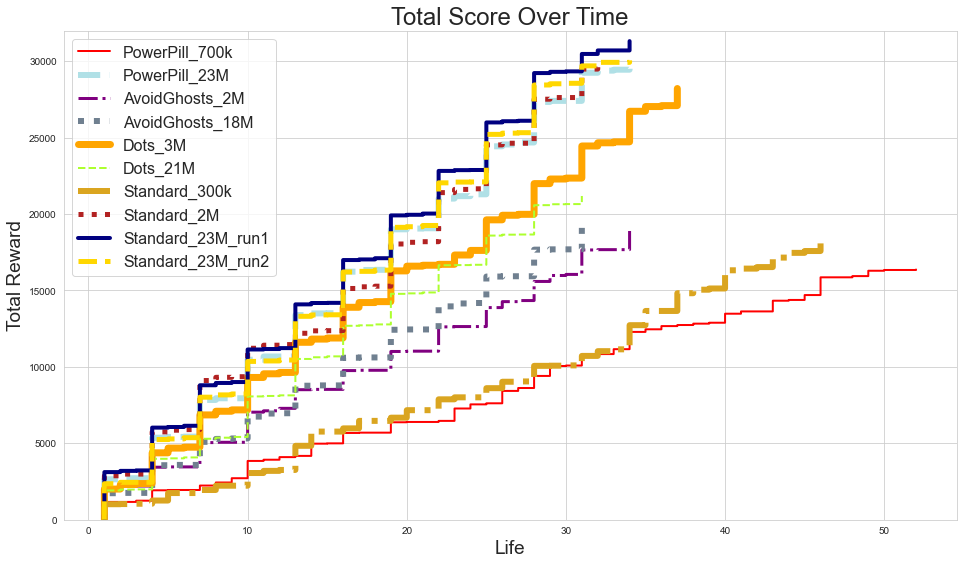

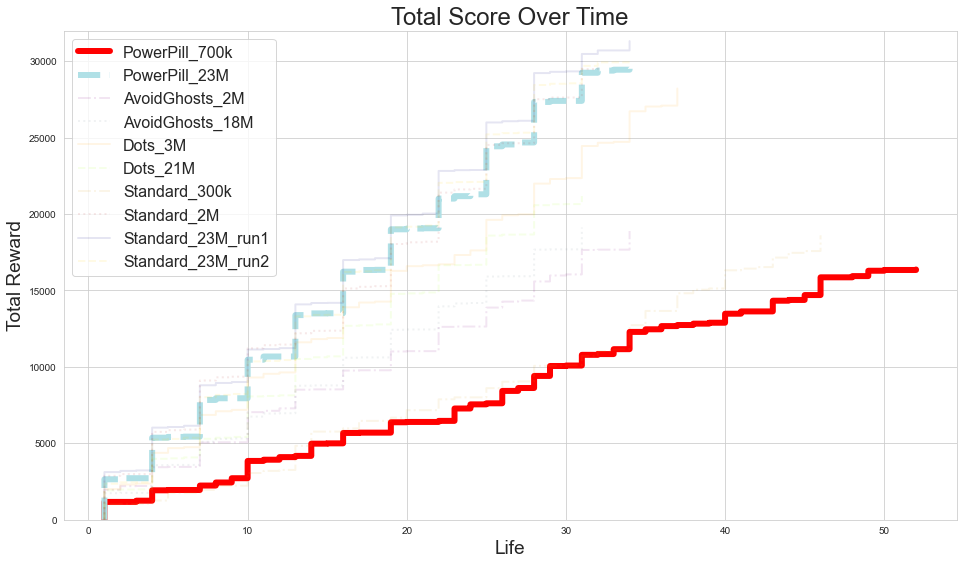

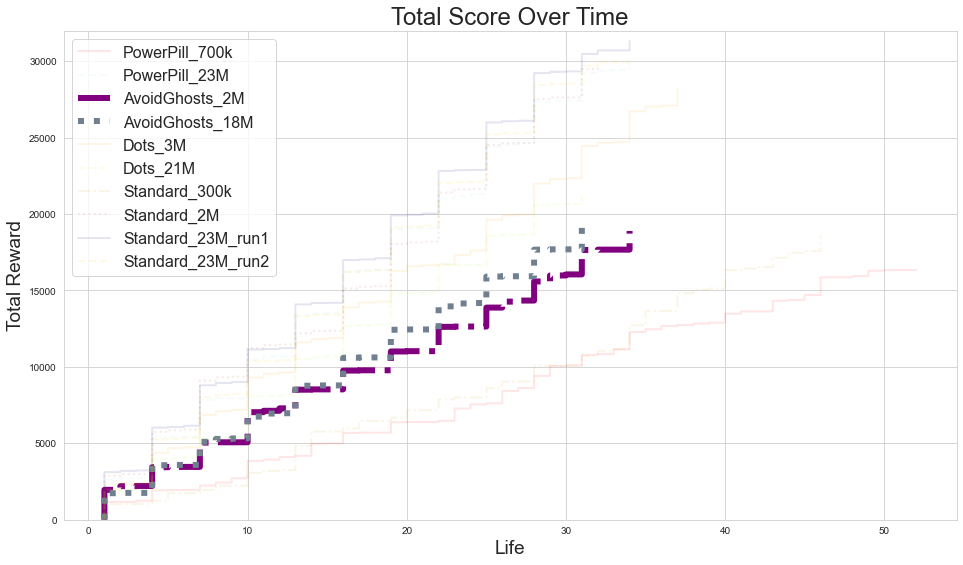

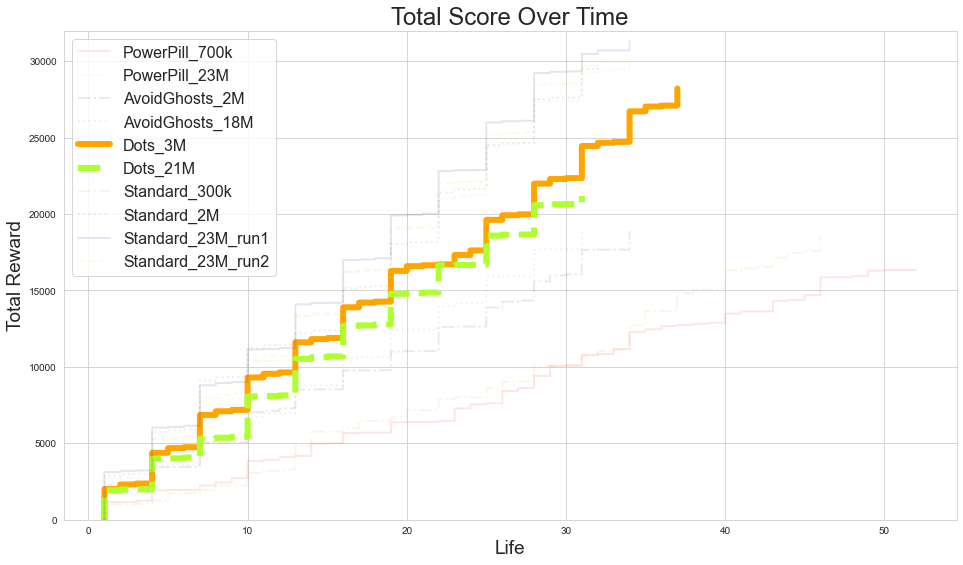

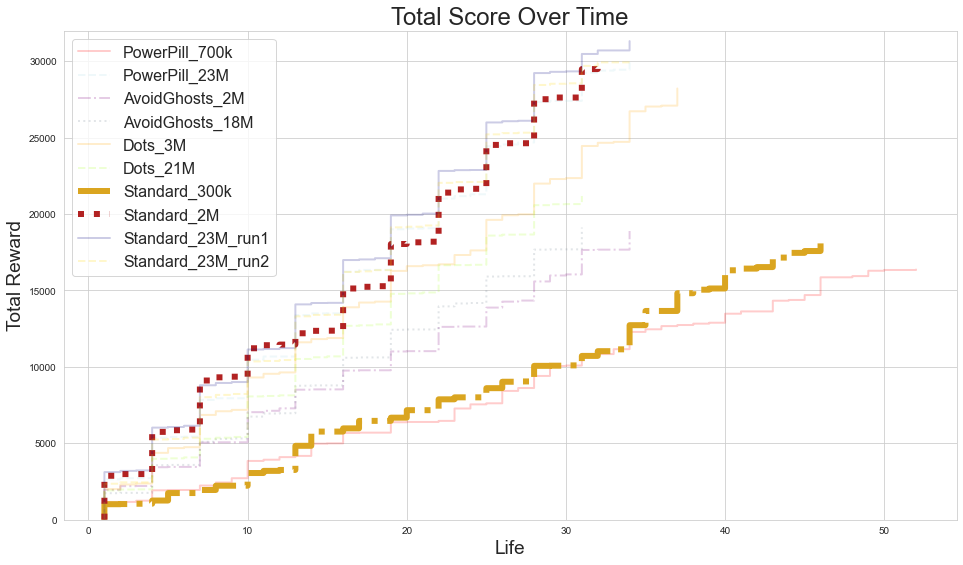

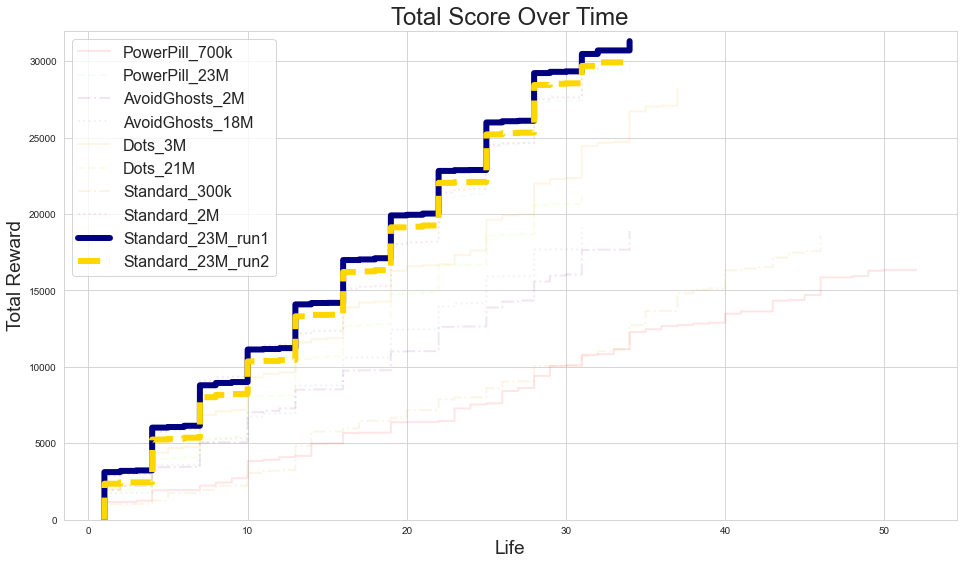

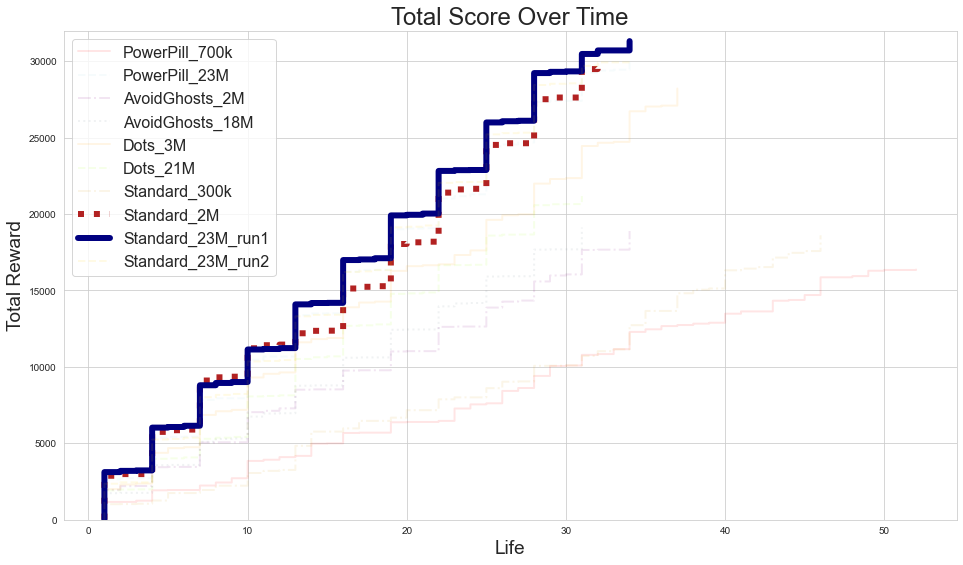

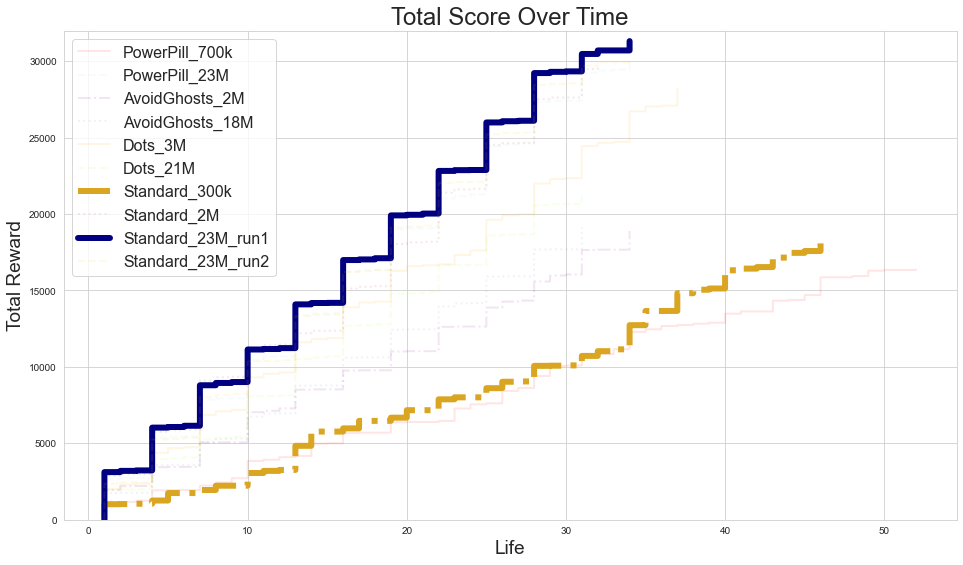

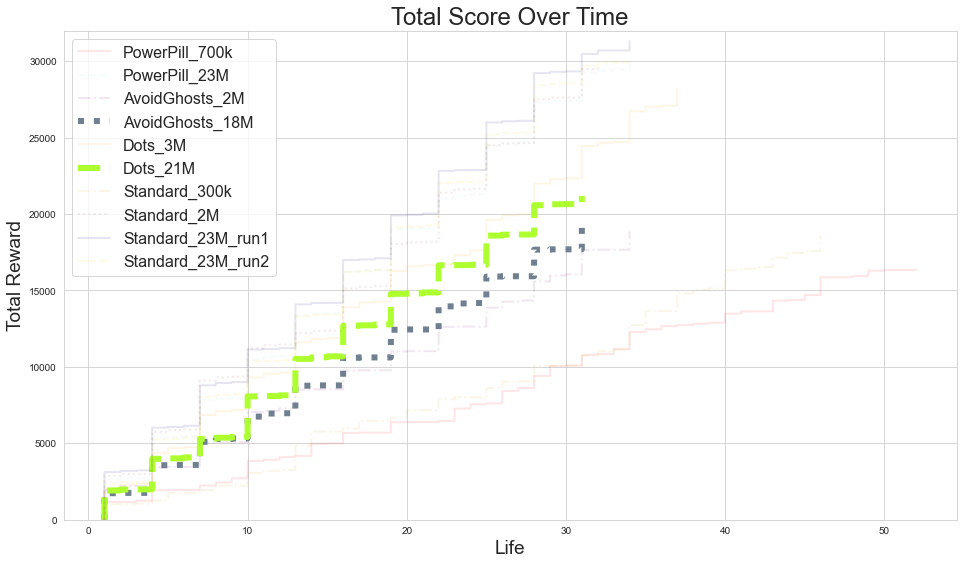

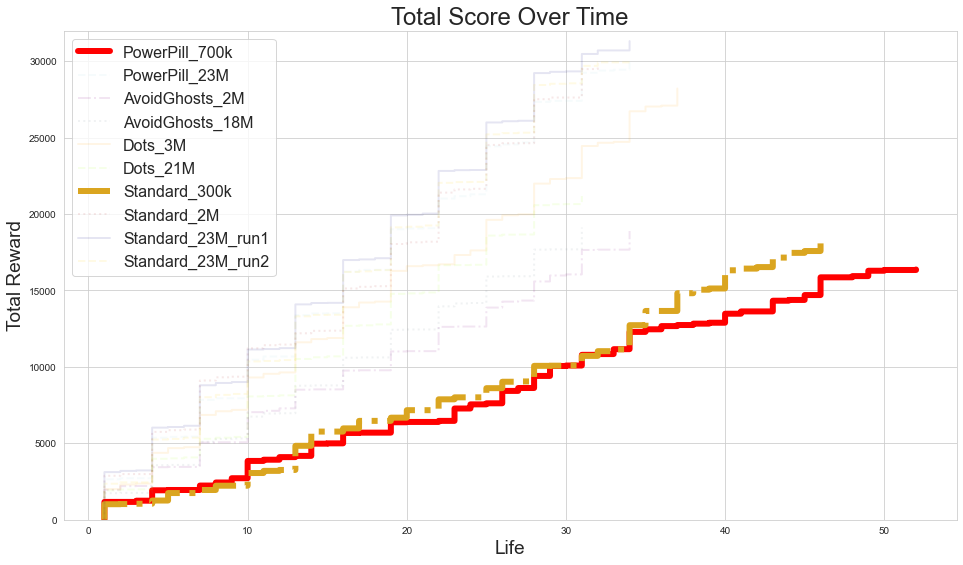

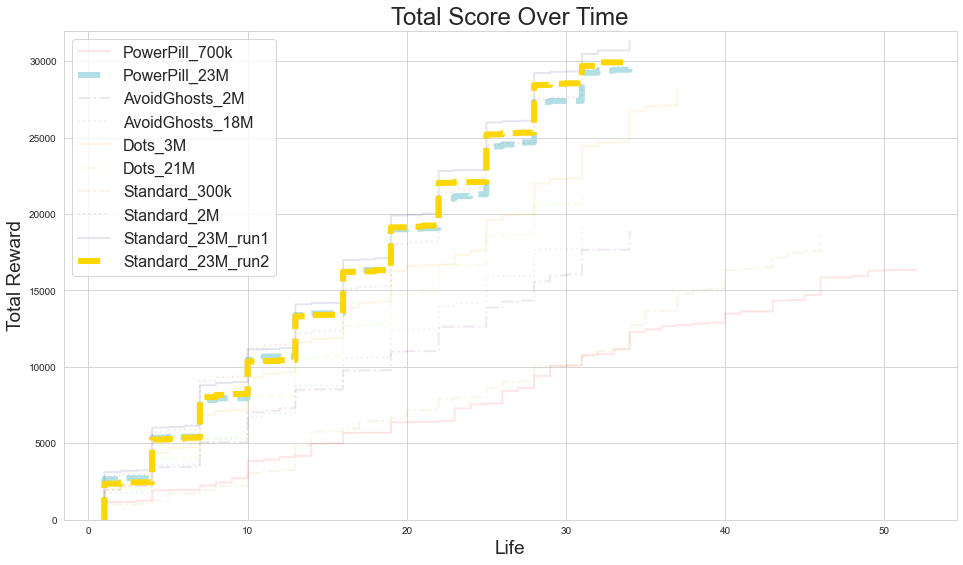

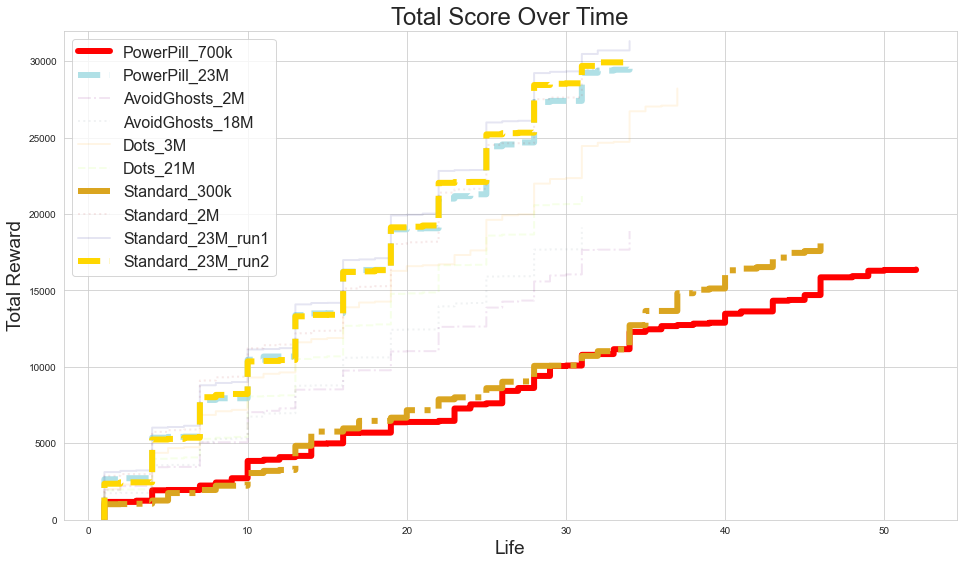

In [20]:
## REWARDS CHARTS
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
cols = ['r','powderblue','purple','slategrey','orange','greenyellow','goldenrod','firebrick','navy','gold']
ws = [2,6,3,6,7,2,6,5,4,5]
al = [1,1,1,1,1,1,1,1,1,1]

for index, num in enumerate(allEvalsDF.agentNum.unique()):
   
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [6,6,2,2,2,2,2,2,2,2]
al = [1,1,.1,.1,.1,.1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_pop.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,6,6,2,2,2,2,2,2]
al = [.1,.1,1,1,.1,.1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_fear.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,6,6,2,2,2,2]
al = [.1,.1,.1,.1,1,1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_nml.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,6,6,2,2]
al = [.2,.2,.2,.2,.2,.2,1,1,.2,.2]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_std_1.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,2,2,6,6]
al = [.1,.1,.1,.1,.1,.1,.1,.1,1,1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_std_2.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,2,6,6,2]
al = [.1,.1,.1,.1,.1,.1,.1,1,1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_std_3.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,6,2,6,2]
al = [.1,.1,.1,.1,.1,.1,1,.1,1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_std_4.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,6,2,6,2,2,2,2]
al = [.1,.1,.1,1,.1,1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_nml_fear.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [6,2,2,2,2,2,6,2,2,2]
al = [1,.1,.1,.1,.1,.1,1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_pop_std_1.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,6,2,2,2,2,2,2,2,6]
al = [.1,1,.1,.1,.1,.1,.1,.1,.1,1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_pop_std_2.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [6,6,2,2,2,2,6,2,2,6]
al = [1,1,.1,.1,.1,.1,1,.1,.1,1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_AgentsForUserStudy.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

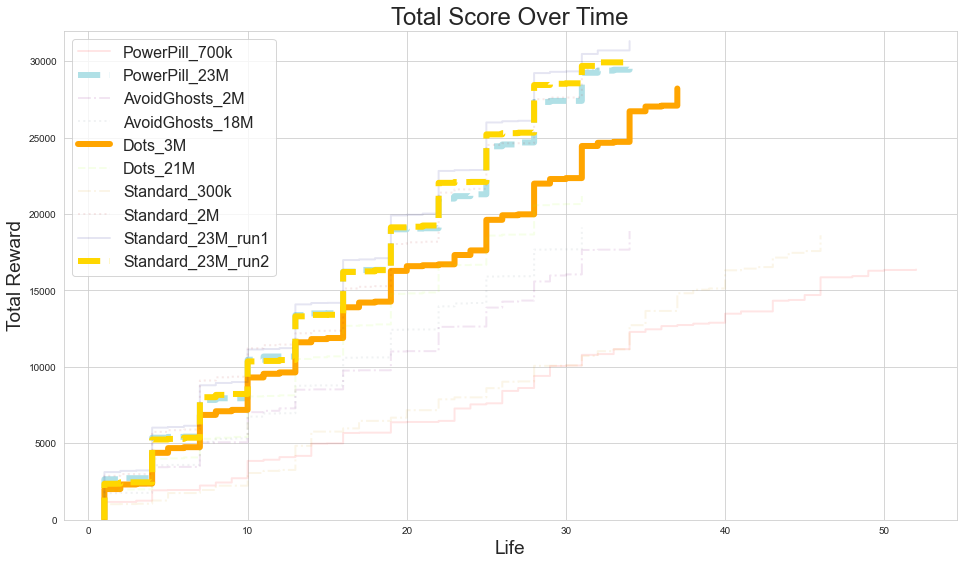

In [21]:
ws = [2,6,2,2,6,2,2,2,2,6]
al = [.1,1,.1,.1,1,.1,.1,.1,.1,1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time", fontsize=fnt)
plt.ylabel("Total Reward", fontsize=fnt2)
plt.xlabel("Life", fontsize=fnt2)
if saveFigs:
    filename = "AllAgentsScores_AgentsForCurriculum.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

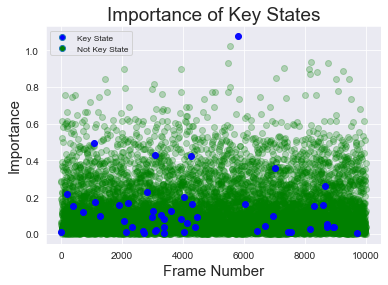

In [36]:
plt.scatter("state", "importance", data = df, alpha = 0.25, c='g')
temp = allEvalsDF[allEvalsDF['key_state']>0]
plt.scatter("state", "importance", data = temp, c = "b", alpha = 0.95)
plt.xlabel('Frame Number', fontsize=fnt3)
plt.ylabel('Importance', fontsize=fnt3)
plt.title("Importance of Key States", fontsize=fnt2)
# plt.legend(loc="best")


a = plt.Rectangle(fakexy, 1, 1, fc="Grey",alpha=0.50)
b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markerfacecolor="b", alpha=1.00)
c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markerfacecolor="g", alpha=1.00)

plt.legend([b,c], ["Key State", "Not Key State"], loc='upper left', fontsize='small')

# call savefig right before show


if saveFigs:
    filename = "ScatterplotOfKeyStatesImportance.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
allEvalsDF[['action','action_name']]

['PowerPill_700k']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


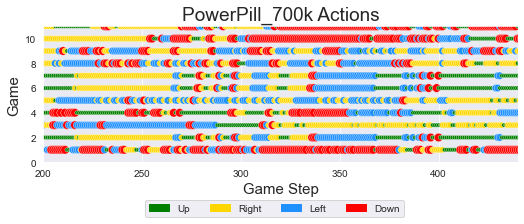

['PowerPill_23M']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


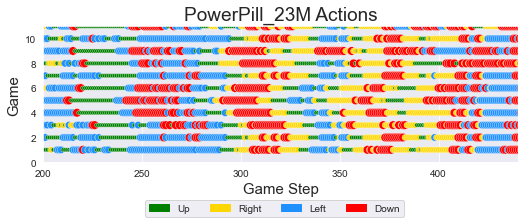

['AvoidGhosts_2M']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


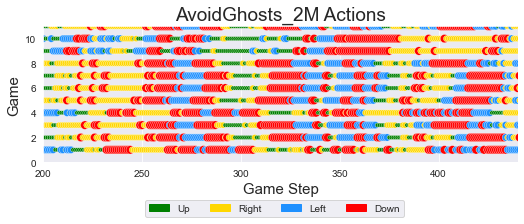

['AvoidGhosts_18M']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


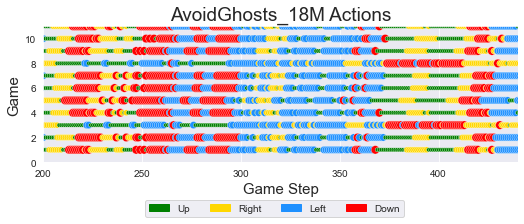

['Dots_3M']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


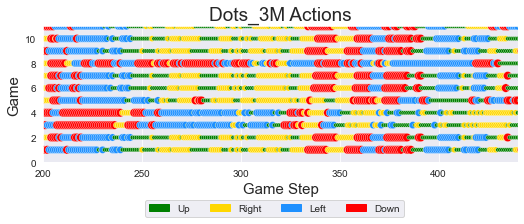

['Dots_21M']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


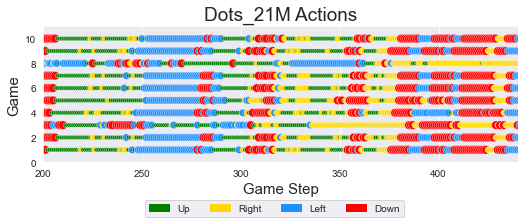

['Standard_300k']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


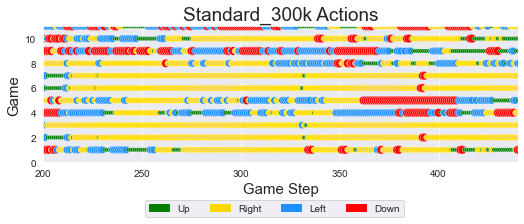

['Standard_2M']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


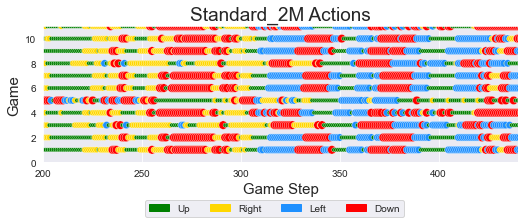

['Standard_23M_run1']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


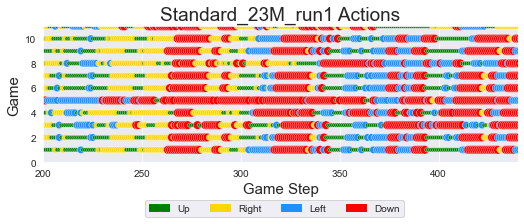

['Standard_23M_run2']


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


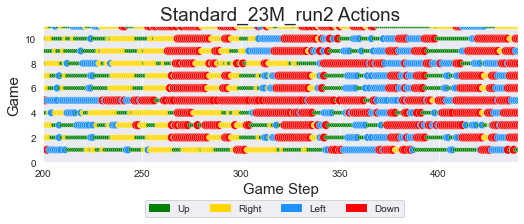

In [38]:
sns.set_style('darkgrid')

diskCols = ['green','gold','dodgerblue','red']

for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    print(allEvalsDF[allEvalsDF['agentNum']==agent_index].agent.unique())
    if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
        plt.figure(figsize=(8.5,2.5))
        df= allEvalsDF[allEvalsDF['agentNum']==df]
        df['action'] = df['action'].replace([0,7,8],1)
        g = sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df, palette=diskCols, legend = True)
        g.set_xlabel("Game Step", fontsize=fnt3)
        g.set_ylabel("Game", fontsize=fnt3)
    #     g.set_xlim((0,df['epoch_step'].max()+90))
        g.set_ylim((0,11))
        g.set_xlim((200,440))
        plt.title(names[agent_index] + " Actions", fontsize=fnt2)
        
    
        legend_elements = [Patch(facecolor='g', edgecolor='g', label='Up'), \
            Patch(facecolor='gold', edgecolor='gold', label='Right'), \
           Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='Left'), \
            Patch(facecolor='r', edgecolor='r', label='Down')]

        plt.legend(handles=legend_elements, bbox_to_anchor= (0.77, -0.24), ncol=4)
    
        if saveFigs:
            filename = names[agent_index] + "_SeabornActionDisks.png"
            filepath = os.path.join(save_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=100, bbox_inches='tight')
        plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other ar

[6.]
[7.]


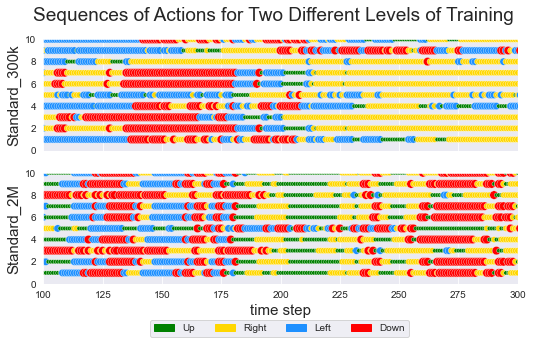

In [41]:
sns.set_style('darkgrid')

df1 = allEvalsDF[allEvalsDF['agentNum']==6.0]
df1['action'] = df1['action'].replace([0,7,8],1)
df2 = allEvalsDF[allEvalsDF['agentNum']==7.0]
df2['action'] = df2['action'].replace([0,7,8],1)
print(df1.agentNum.unique())
print(df2.agentNum.unique())

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8.5,4.5),sharey=True,sharex=True)

sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df1, palette=diskCols, legend = False, ax=axes[0])
sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df2, palette=diskCols, legend = False, ax=axes[1])

axes[0].set_xlim(100,300)
axes[0].set_ylim(0,10)
axes[0].set_ylabel("Standard_300k", fontsize=fnt3)
axes[0].set_xlabel("")

axes[1].set_xlim(100,300)
axes[1].set_ylim(0,10)
axes[1].set_ylabel("Standard_2M", fontsize=fnt3)
axes[1].set_xlabel("time step", fontsize=fnt3)
fig.suptitle("Sequences of Actions for Two Different Levels of Training", fontsize=fnt2)

legend_elements = [Patch(facecolor='g', edgecolor='g', label='Up'), \
            Patch(facecolor='gold', edgecolor='gold', label='Right'), \
           Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='Left'), \
            Patch(facecolor='r', edgecolor='r', label='Down')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, 0.03), ncol=4)
    
if saveFigs:
    filename = "Standard_300k_Standard_2M_SeabornActionDisks.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other ar

[0.]
[1.]


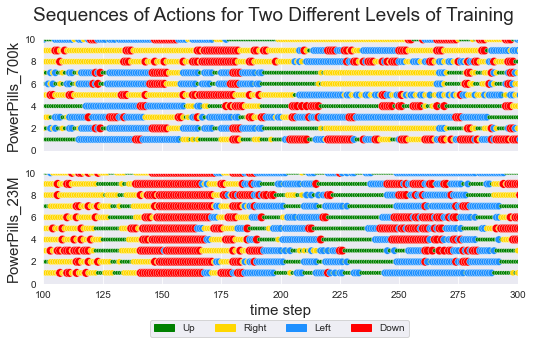

In [44]:
sns.set_style('darkgrid')

df1 = allEvalsDF[allEvalsDF['agentNum']==0.0]
df1['action'] = df1['action'].replace([0,7,8],1)
df2 = allEvalsDF[allEvalsDF['agentNum']==1.0]
df2['action'] = df2['action'].replace([0,7,8],1)
print(df1.agentNum.unique())
print(df2.agentNum.unique())

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8.5,4.5),sharey=True,sharex=True)

sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df1, palette=diskCols, legend = False, ax=axes[0])
sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df2, palette=diskCols, legend = False, ax=axes[1])

axes[0].set_xlim(100,300)
axes[0].set_ylim(0,10)
axes[0].set_ylabel("PowerPills_700k", fontsize=fnt3)
axes[0].set_xlabel("")

axes[1].set_xlim(100,300)
axes[1].set_ylim(0,10)
axes[1].set_ylabel("PowerPills_23M", fontsize=fnt3)
axes[1].set_xlabel("time step", fontsize=fnt3)
fig.suptitle("Sequences of Actions for Two Different Levels of Training", fontsize=fnt2)

legend_elements = [Patch(facecolor='g', edgecolor='g', label='Up'), \
            Patch(facecolor='gold', edgecolor='gold', label='Right'), \
           Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='Left'), \
            Patch(facecolor='r', edgecolor='r', label='Down')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, 0.03), ncol=4)

if saveFigs:
    filename = "PowerPills_700k_PowerPills_23M_SeabornActionDisks.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()